  ## Dataset: Cardiovascular heart disease
  ## Dataset URL: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
  ## Algorithms Used: Support Vector Classifier (SVC)


# Setup <a class="anchor"  id="setup"></a>


Importing all the required libraries and functions

In [1]:
!pip uninstall scikit-learn
!pip install scikit-learn
!pip install matplotlib

Found existing installation: scikit-learn 1.2.1
Uninstalling scikit-learn-1.2.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/scikit_learn-1.2.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
### Data Handline
import pandas as pd
import numpy as np

### Utility
import math
import warnings
import string

### Plotting
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D


# Model
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay 


#LDA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector

#RND Forest
from sklearn.ensemble import RandomForestClassifier

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#Support Vector Classifier
from sklearn import svm
from sklearn.svm import LinearSVC

# Seaborn
import seaborn as sns

warnings.filterwarnings("ignore")

**Read dataset.**

In [3]:
cardio = pd.read_csv("/content/cardio_train.csv",delimiter=";")

cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Data Preprocessing

In [5]:
num_entries = cardio.shape[0]*cardio.shape[1]
print('Number of entries in the dataframe: ', num_entries)

num_missing_values = cardio.isna().sum().sum()
print('Missing values: ', num_missing_values, '\n')

cardio_dup = cardio.duplicated().sum()
if cardio_dup:
    print('Duplicates Rows in Dataset are : {}'.format(cardio_dup))
else:
    print('Dataset contains no Duplicate Values')

Number of entries in the dataframe:  910000
Missing values:  0 

Dataset contains no Duplicate Values


In [6]:
#Dropping all duplicated rows.
cardio.drop_duplicates(inplace=True)

#dropping id column because it is clearly not correlated in any way with the target
cardio.drop(['id'], axis=1,inplace=True)

In [7]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**Observations**
- 'Age' column has to be recalculated it has a minimum values of 10789' which is unrealistic therefore they represents a missing/incorrect value.
- 'Weight' column have unrealistic min/max values.
- Systolic blood pressure "ap_hi" and Diastolic blood pressure "ap_lo" cannot be negative
- If ap_hi and ap_lo are more than 180 and 120 mmHg respectively then it is an hypertensive crisis, which is an emergency case. Therefore max values are not realistic.



In [8]:
#Age is written in days, so we're converting it to years 
cardio['age'] = cardio['age'].apply(lambda x: x/365)  

In [9]:
outliers = len(cardio[(cardio["ap_hi"]>=280) | (cardio["ap_lo"]>=220) | (cardio["ap_lo"] < 0) | (cardio["ap_hi"] < 0) | (cardio["ap_hi"]<cardio["ap_lo"])])

print(f'we have total {outliers} outliers')
print(f'percent missing: {round(outliers/len(cardio)*100,1)}%')

we have total 1275 outliers
percent missing: 1.8%


In [10]:
#Filtering out the unrealistic data of Systolic blood pressure and Diastolic blood pressure
cardio = cardio[ (cardio['ap_lo'] >= 0) & (cardio['ap_hi'] >= 0) ]  #remove negative values
cardio = cardio[ (cardio['ap_lo'] <= 220) & (cardio['ap_hi'] <= 280) ]  #remove fishy data points
cardio = cardio[ (cardio['ap_lo'] < cardio['ap_hi']) ]  #remove systolic higher than diastolic


In [11]:
Q1_hi = cardio['ap_hi'].quantile(0.05) # 5th percentile of the data of the given feature
Q3_hi = cardio['ap_hi'].quantile(0.95)  # 95th percentile of the data of the given feature
IQR_hi = Q3_hi - Q1_hi
lower, upper = Q1_hi - 1.5 * IQR_hi, Q3_hi + 1.5 * IQR_hi
cardio = cardio[(cardio['ap_hi'] >= lower) & (cardio['ap_hi'] <= upper)]  

Q1_lo = cardio['ap_lo'].quantile(0.05) # 5th percentile of the data of the given feature
Q3_lo = cardio['ap_lo'].quantile(0.95)  # 95th percentile of the data of the given feature
IQR_lo = Q3_lo - Q1_lo
lower, upper = Q1_lo - 1.5 * IQR_lo, Q3_lo + 1.5 * IQR_lo
cardio = cardio[(cardio['ap_lo'] >= lower) & (cardio['ap_lo'] <= upper)]  

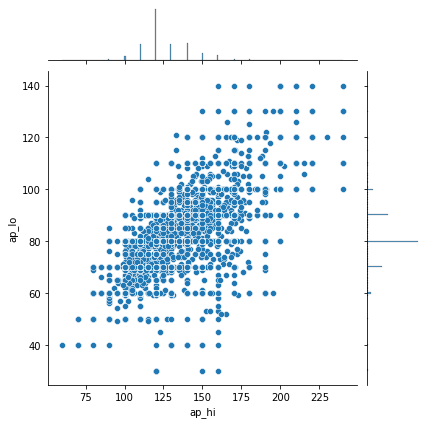

In [12]:
sns.jointplot(x='ap_hi', y='ap_lo', data=cardio);

## 1.1 - IQR based filtering - height, weight




<AxesSubplot:>

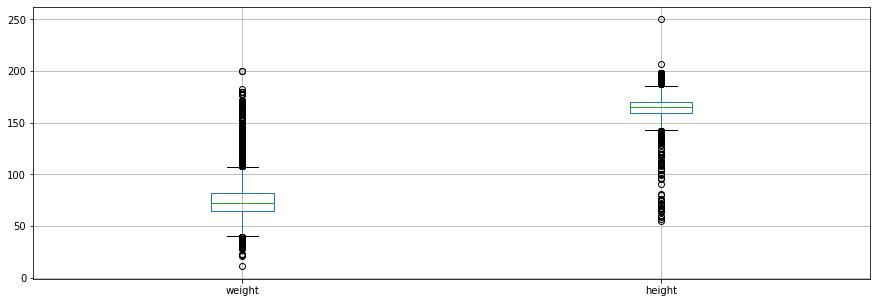

In [13]:
plt.figure(figsize=(15,5))
cardio.boxplot(['weight','height'])

In [14]:
#--------------------1.Variant-----------------------------------------------
#Filtering out the smallest and tallest human ever known were 54 cm and 251 cm respectively so 
len(cardio[(cardio['height'] > 251) | (cardio['height'] < 54)])

0

In [15]:
#-------------------2.Variant------------------------------------------------
#Function that detects the outlier given interquartile range
def detect_outliers(df,q1,q3):
  for col in df.columns:
    df_feature = df[col]
    Q1 = df_feature.quantile(q1) # 25th percentile of the data of the given feature
    Q3 = df_feature.quantile(q3)  # 75th percentile of the data of the given feature
    IQR = Q3 - Q1    #IQR is interquartile range. 
    print(f'Feature: {col}-------------')
    print(f'Percentiles: {int(q1*100)}th={Q1}, {int(q3*100)}th={Q3}, IQR={IQR}')
    # calculate the outlier lower and upper bound
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    # identify outliers
    outliers = [x for x in df_feature if x < lower or x > upper]
    print('Identified outliers: %d \n' % len(outliers))
    # remove outliers 
    #cardio = df[(df_feature >= lower) & (df_feature <= upper)]  
  
detect_outliers(cardio[['height', 'weight']],0.05,0.95)

Feature: height-------------
Percentiles: 5th=152.0, 95th=178.0, IQR=26.0
Identified outliers: 46 

Feature: weight-------------
Percentiles: 5th=55.0, 95th=100.0, IQR=45.0
Identified outliers: 20 



In [16]:
#After the observation we can remove the outliers weight, height
cardio_cleaned = cardio 
for col in ['height','weight']:
  Q1 = cardio[col].quantile(0.05) # 5th percentile of the data of the given feature
  Q3 = cardio[col].quantile(0.95)  # 95th percentile of the data of the given feature
  IQR = Q3 - Q1
  lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
  cardio_cleaned = cardio_cleaned[(cardio_cleaned[col] >= lower) & (cardio_cleaned[col] <= upper)]  


## 1.2 - BMI - filtering <a class="anchor"  id="bmi"></a>

we can create new feature BMI (Body Mass Index) with height and weight. It might lead us to get better insights. The BMI says whether the person is in normal health or not . To calcualte it we have a formula

\begin{equation}
BMI = \tfrac{weight}{height^2}
\end{equation}

*BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared*

In [17]:
# calculating the patient BMI (Body Mass Index)  
cardio_cleaned['BMI'] = round(cardio_cleaned['weight']/((cardio_cleaned['height']/100)**2),1)
cardio_cleaned.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [18]:
#Filtering out the extreme values (unhealthy health) of BMI data according to BMI chart above
cardio_cleaned = cardio_cleaned[ (cardio_cleaned['BMI'] < 60) & (cardio_cleaned['BMI'] > 10)]

In [19]:
#Dataset after cleaning
print(f'Number of rows of cardio dataset after data preprocessing: {len(cardio_cleaned)}')
print(f'How much percent missing: {round((70000-len(cardio_cleaned))/70000*100,2)}%')

Number of rows of cardio dataset after data preprocessing: 68584
How much percent missing: 2.02%


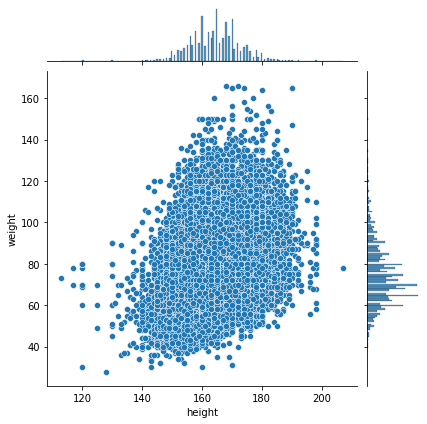

In [20]:
#To study the joint distribution of two numerical features, the jointplot of the Seaborn library can be useful:
sns.jointplot(x='height', y='weight', data=cardio_cleaned);

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

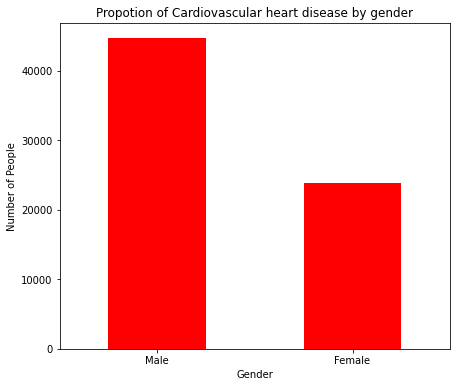

In [21]:
#Distribution of cardiovascular heart disease by gender
gender = cardio_cleaned['gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="r")
ax.set_title("Propotion of Cardiovascular heart disease by gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

- From the bar chart, it can be seen that the probability of disease is higher when the gender is male.

# 2 - Feature Engineering <a class="anchor"  id="feature"></a>

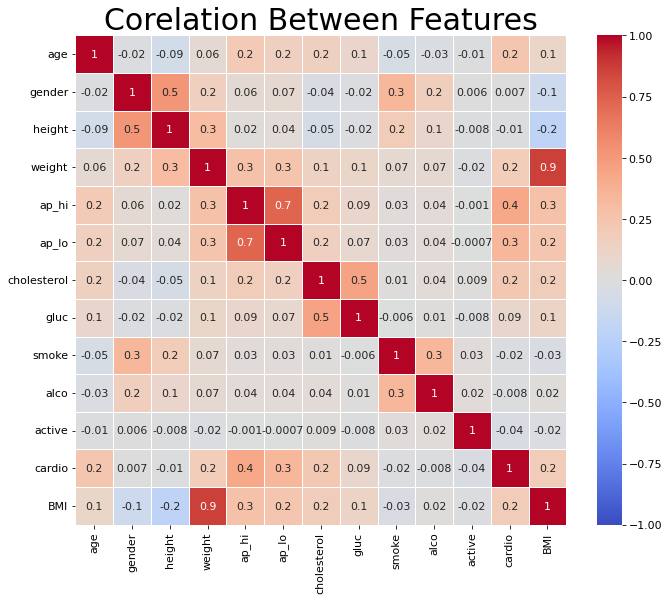

In [22]:
#plotting correlation map
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(cardio_cleaned.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, fmt='.1g', linewidths=.5);
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

**Observations**
*   age and cholesterol have significant impact, but not very high correlated with target class.
*   ap_hi has the highest correlation with the target value, so it has significant impact to our model. also same with ap_lo
*   Newly formed feature 'BMI' doesn't have good correlation with the target and it highly correlated with "weight" so one could drop one of the features.
*   'gender', 'smoke' and 'height' are the least correlated features with target




# 3- ML model

## 3.1 - Model preparation <a class="anchor"  id="modelprep"></a>




In [23]:
#we perform some Standardization
cardio_scaled=cardio_cleaned.copy()

columns_to_scale = ['age', 'weight', 'ap_hi', 'ap_lo','cholesterol','gender','BMI','height']

scaler = StandardScaler()
cardio_scaled[columns_to_scale] = scaler.fit_transform(cardio_cleaned[columns_to_scale])

cardio_scaled.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,-0.434227,1.366947,0.453582,-0.853029,-0.999477,-0.137142,-0.537143,1,0,0,1,0,-1.047959
1,0.309323,-0.731557,-1.063527,0.772526,0.799796,0.923664,2.408948,1,0,0,1,1,1.437575
2,-0.246212,-0.731557,0.074304,-0.711677,0.200039,-1.197948,2.408948,1,0,0,0,1,-0.758943
3,-0.746234,1.366947,0.580007,0.560497,1.399554,1.984469,-0.537143,1,0,0,1,1,0.242977
4,-0.806609,-0.731557,-1.063527,-1.277087,-1.599234,-2.258753,-0.537143,1,0,0,0,0,-0.855282


In [24]:
#we perform some Standardization
cardio_scaled_mm=cardio_cleaned.copy()

columns_to_scale_mm = ['age', 'weight', 'ap_hi', 'ap_lo','cholesterol','gender','BMI','height']

mmscaler = MinMaxScaler()
cardio_scaled_mm[columns_to_scale_mm] = mmscaler.fit_transform(cardio_cleaned[columns_to_scale_mm])

cardio_scaled_mm.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0.588076,1.0,0.585106,0.246377,0.277778,0.454545,0.0,1,0,0,1,0,0.231557
1,0.730159,0.0,0.457447,0.413043,0.444444,0.545455,1.0,1,0,0,1,1,0.495902
2,0.624003,0.0,0.553191,0.260870,0.388889,0.363636,1.0,1,0,0,0,1,0.262295
3,0.528455,1.0,0.595745,0.391304,0.500000,0.636364,0.0,1,0,0,1,1,0.368852
4,0.516918,0.0,0.457447,0.202899,0.222222,0.272727,0.0,1,0,0,0,0,0.252049




---


**Train test split**

split ratio 80:20.

In [25]:
#Train-test-split for non-scaled data
X = cardio_cleaned.drop(['cardio'], axis=1) #features 
y = cardio_cleaned['cardio']  #target feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)


#Train-test-split for scaled data
X_scaled = cardio_scaled.drop(['cardio'], axis=1) #features 
y_scaled = cardio_scaled['cardio']  #target feature

X_scaled_mm = cardio_scaled_mm.drop(['cardio'], axis=1) #features 
y_scaled_mm = cardio_scaled_mm['cardio']  #target feature

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle = True)
X_train_scaled_mm, X_test_scaled_mm, y_train_scaled_mm, y_test_scaled_mm = train_test_split(X_scaled_mm, y_scaled_mm, test_size=0.2, random_state=42, shuffle = True)


#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (54867, 12)
X_test shape is  (13717, 12)
y_train shape is  (54867,)
y_test shape is  (13717,)


## 3.2 - Support Vector Classifier <a class="anchor"  id="svc"></a>

- Comparison of differet kernels (Linear, Radial Basis Function and Polynomial with a degree of 3)
- Feature Subset Selection and Hyperparameter Tuning does not improve the accuracy (tested beforehand and left out due to time constraint)


In [26]:
viewer_mode = True
if viewer_mode:
  print("Support Vector Classifier takes very long.")
else:
  C = 1.0  # SVM regularization parameter
  models = (svm.SVC(kernel='linear', C=C),
            svm.SVC(kernel='rbf', gamma=0.7, C=C),
            svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))


  accuracy_svc = []
  for clf in models: 
      clf.fit(X_train_scaled, y_train_scaled)
      y_pred = clf.predict(X_test_scaled)
      accuracy_svc.append(accuracy_score(y_test_scaled, y_pred))
      print(f"Accuracy: ",  accuracy_score(y_test_scaled, y_pred))


Support Vector Classifier takes very long.


In [27]:
if viewer_mode:
  max_accuracy_svc=0.734126
  true_positive_svc=0.660243 	
  print('Support Vector Classifier with highest accuracy: Polynomial')
  print('Accuracy =', max_accuracy_svc) 
  print('Sensitivity (TPR) =', true_positive_svc)
else:
  svc_clf_list = ['Linear', 'Radial Basis Function', 'Polynomial']

  max_accuracy_svc = max(accuracy_svc)
  max_svc_index = np.argmax(accuracy_svc)

  svc_clf = models[max_svc_index]
  svc_clf.fit(X_train_scaled, y_train_scaled)
  y_predict = svc_clf.predict(X_test_scaled)
  svc_report = classification_report(y_test, y_predict)

  cm_svc = confusion_matrix(y_test, y_predict)

  true_positive_svc = cm_svc[1][1]/sum(y_test)

  print('Accuracy =', max_accuracy_svc) 
  print('Sensitivity (TPR) =', true_positive_svc)
  print('Support Vector Classifier with highest accuracy:', svc_clf_list[max_svc_index]) 

  print('\n Confusion matrix \n \n')
  plot_confusion_matrix(svc_clf, X_test_scaled, y_test_scaled)
  plt.show()

Support Vector Classifier with highest accuracy: Polynomial
Accuracy = 0.734126
Sensitivity (TPR) = 0.660243


In [28]:
#collect results
tpr_weight = 0.25
models = pd.DataFrame({
    'Model': ['Support Vector Classifier'],
    'Accuracy': [max_accuracy_svc],
                    
    'Sensitivity' : [true_positive_svc],
    'Objective Value' : [max_accuracy_svc+true_positive_svc*tpr_weight] })

models

,Model,Accuracy,Sensitivity,Objective Value
0,Support Vector Classifier,0.734126,0.660243,0.899187


In [29]:
#collect results for plotting
df_plotting = pd.DataFrame({
    'Model': ['Support Vector Classifier', 
              'Support Vector Classifier'],
    'Values': [max_accuracy_svc,
             true_positive_svc],
    'Type': ['Accuracy','Sensitivity'],
    'Color': ['gray','gray']})

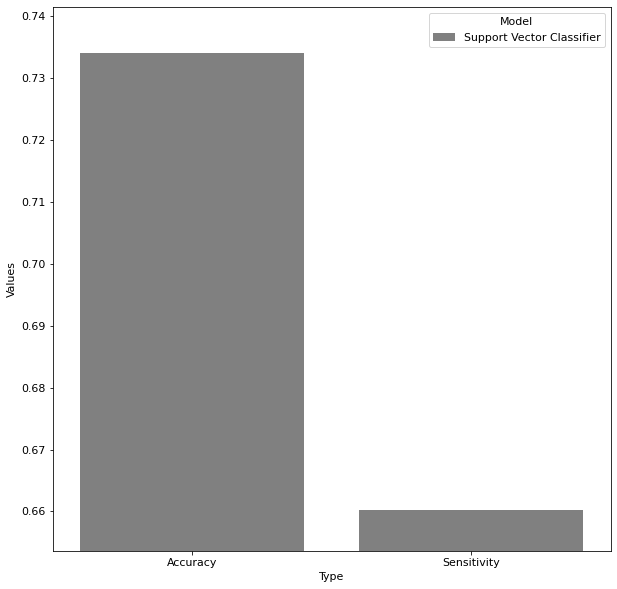

In [32]:
#plot result comparison
plt.figure(figsize=(10,10))
sns.barplot(y=df_plotting['Values'],x=df_plotting['Type'], hue=df_plotting['Model'], orient ="v", palette=df_plotting['Color'])
plt.ylim(min(df_plotting['Values'])* 0.99, max(df_plotting['Values'])*1.01)
#plt.gcf().set_size_inches(50,10)
plt.show()

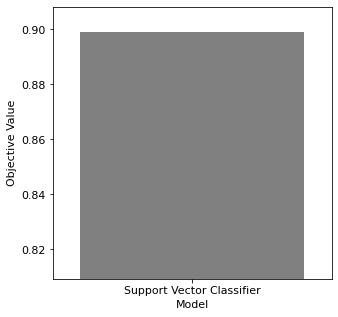

In [33]:
#plot result comparison
plt.figure(figsize=(5,5))
sns.barplot(y=models['Objective Value'],x=models['Model'], orient ="v", palette=df_plotting['Color'])
#sns.barplot(y=models['Sensitivity'],x=models['Model'], orient ="v")
plt.ylim(min(models['Objective Value'])* 0.9, max(models['Objective Value'])*1.01)
#sns.despine()
plt.show()